In [16]:
from cnbpy.utils import retinotopy_prior
from cnbpy.utils import MMP_masker
import pandas as pd
import numpy as np
import pkg_resources
import os
from cnbpy.pycortex_vis import basic_plot

retprior=retinotopy_prior(sub='fsaverage')

In [17]:
params=['prf_polar_angle','prf_eccentricity']
x=[retprior.get_param(param=param) for param in params]
ret_frame=pd.DataFrame(np.array(x).T)
ret_frame.columns=params

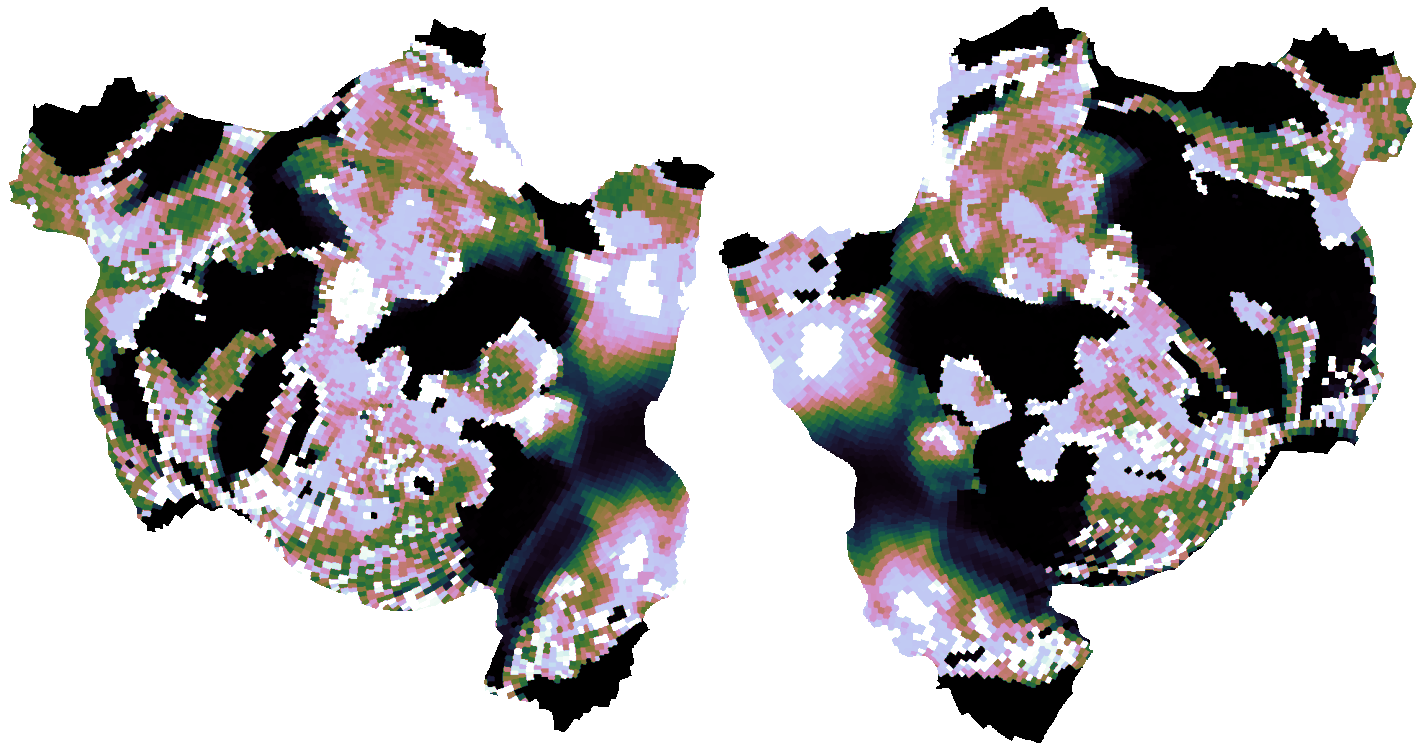

In [22]:
ecc=basic_plot(ret_frame['prf_eccentricity'],vmin=0,vmax=10,cmap='cubehelix',subject='fsaverage5')

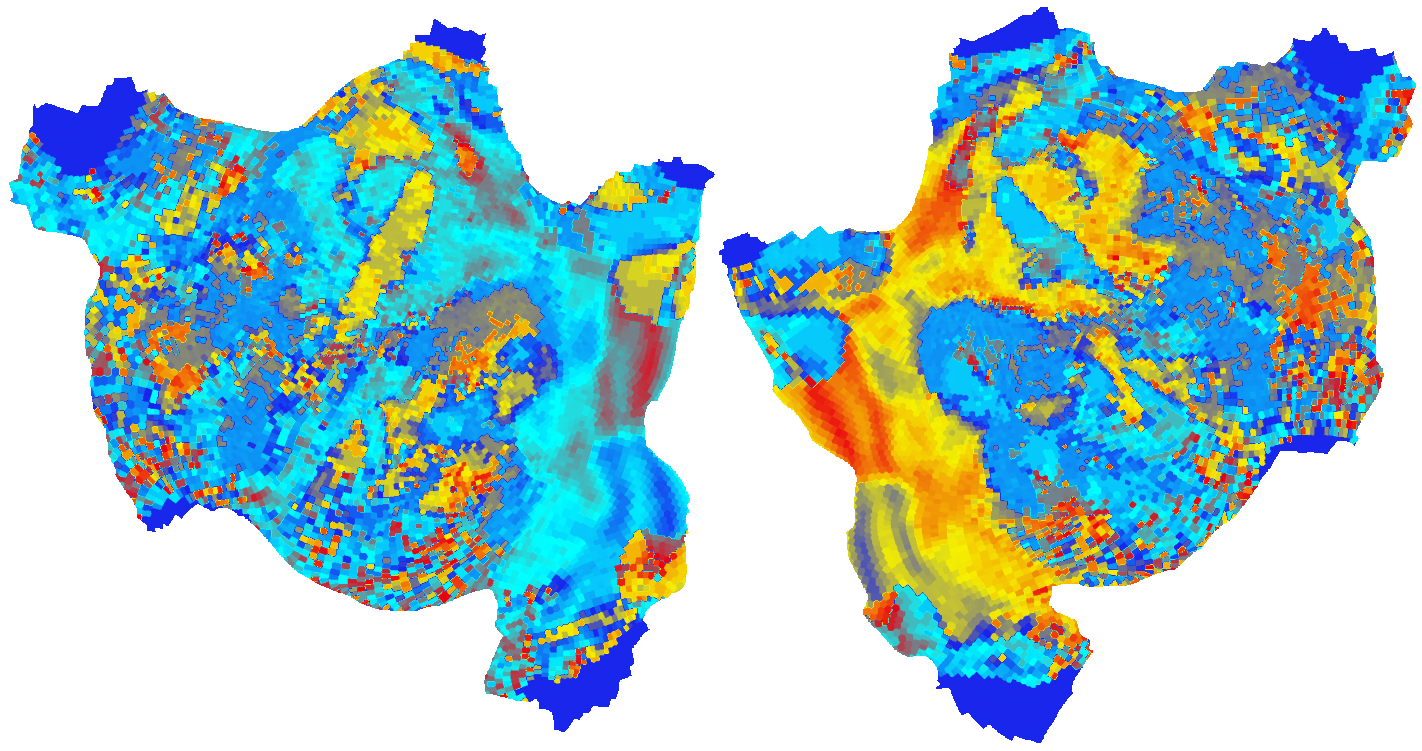

In [23]:
ecc=basic_plot(ret_frame['prf_polar_angle'],vmin=-180,vmax=180,cmap='Retinotopy_RYBCR',subject='fsaverage5')

In [24]:
data_path = pkg_resources.resource_filename('cnbpy', 'test/data')
ret_frame.to_csv(os.path.join(data_path,'retinotopy_prior.csv'))

In [25]:
champ=MMP_masker()

In [26]:
a=champ.make_roi_mask('V1')

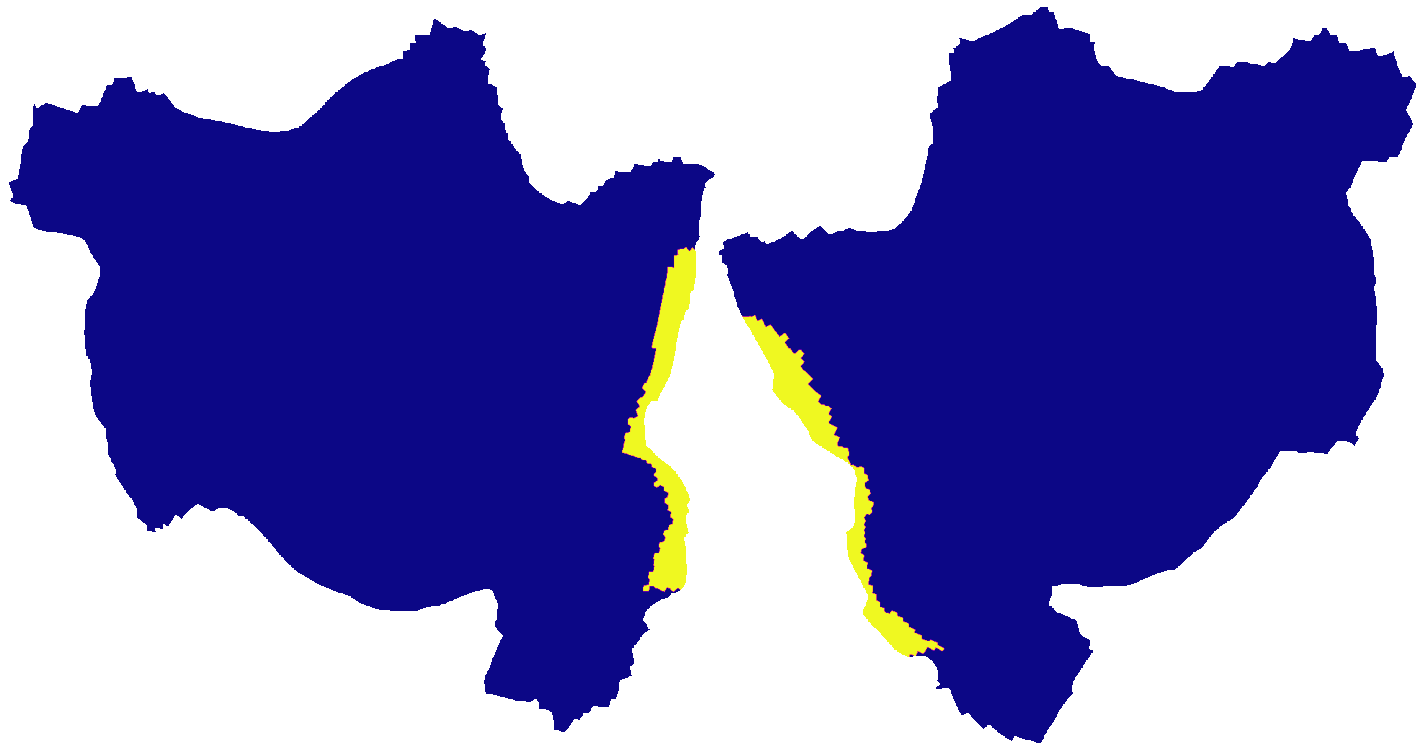

In [30]:
source=basic_plot(a[-1],vmin=0,vmax=1,cmap='plasma',subject='fsaverage5')

In [31]:
from prfpy.utils import subsurface
myv1surf=subsurface('fsaverage5',[a[0],a[1]])
myv1surf.create()

/home/users/yg916972/Software/prfpy/prfpy/model.py:3: UserWarning: 

 | Using Nistats with Nilearn versions >= 0.7.0 is redundant and potentially conflicting.
 | Nilearn versions 0.7.0 and up offer all the functionality of Nistats as well the latest features and fixes.
 | We strongly recommend uninstalling Nistats and using Nilearn's stats & reporting modules.

  from nistats.hemodynamic_models import spm_hrf, spm_time_derivative, spm_dispersion_derivative


Generating subsurfaces
Creating distance by distance matrices


/home/users/yg916972/.conda/envs/p3env/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/users/yg916972/.conda/envs/p3env/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [88]:
empty=np.zeros_like(a[-1])
empty[myv1surf.subsurface_verts]=1

In [98]:
comparison = empty == a[-1].astype(int)
equal_arrays = comparison.all()

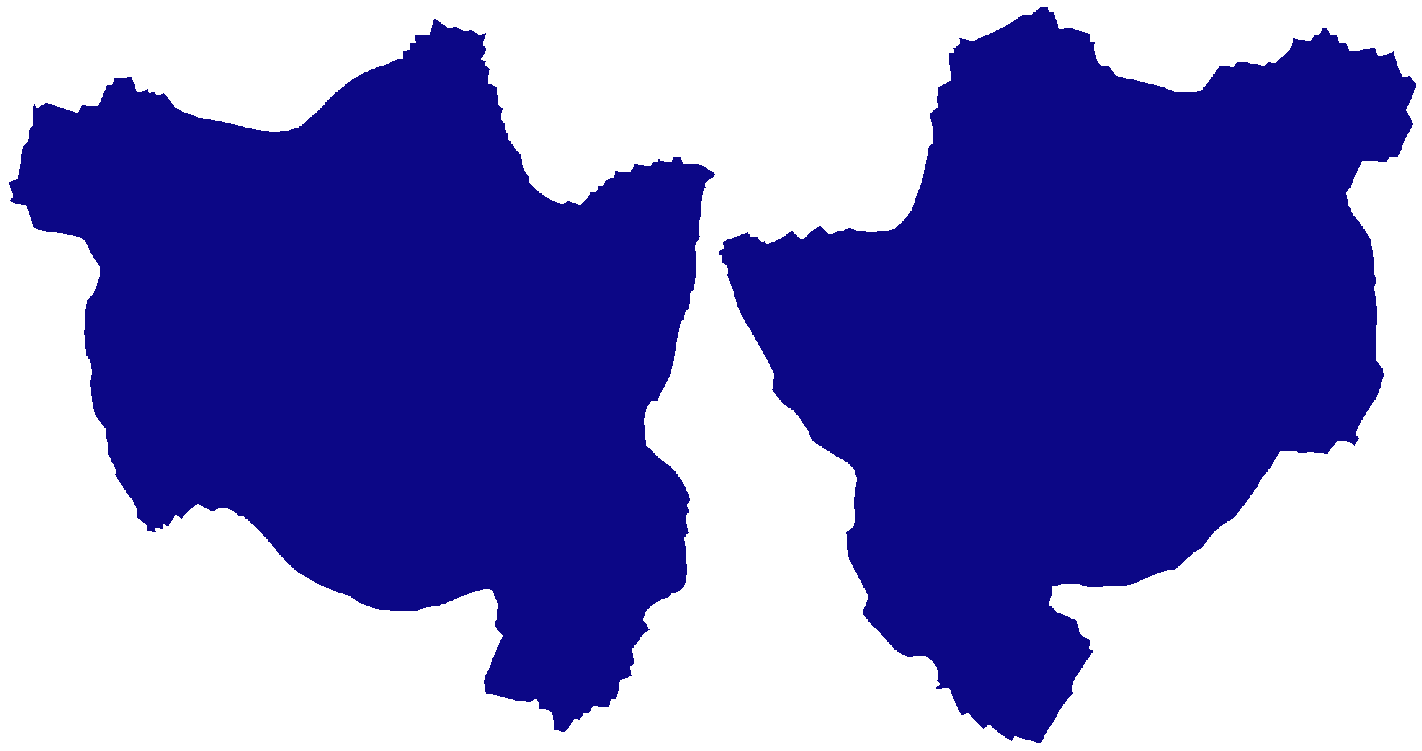

In [97]:
source=basic_plot(empty-a[-1].astype(int),vmin=0,vmax=1,cmap='plasma',subject='fsaverage5')

In [40]:
from prfpy.rf import gauss1D_cart

jemp=gauss1D_cart(myv1surf.distance_matrix[0],0,1)

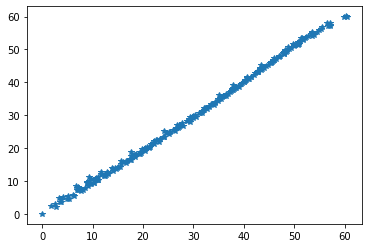

In [80]:
plt.plot(myv1surf.distance_matrix[1,:],myv1surf.distance_matrix[:,1],'*')

In [85]:
myv1surf.distance_matrix[400,400]

0.0

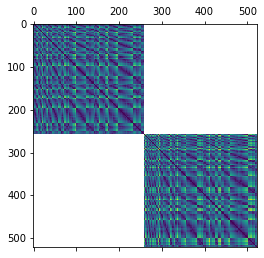

In [71]:
plt.plot(myv1surf.distance_matrix[-180,:],myv1surf.distance_matrix[:,-180],'*')